# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# Libraries for data preparation and model building
# import *

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load train data
df_train = pd.read_csv("df_train.csv", index_col=0)

In [3]:
#Brief view of data
df_train.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# View data quality
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


    Looking at the above results, the column "Valencia_pressure" contains some null values, it will be necessary to determine the proportion of the null values to the total data expected for the colunm, to aid decision with the column.

In [5]:
# look at data statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


##### Decision on Null values
Valencia_pressure is the only column with null values, before we decide on what action to take on it, we have tp proper knowl how the data is distributed. Fom the values above, the data seems to be okay, however we have to visualize this to aid our decision.

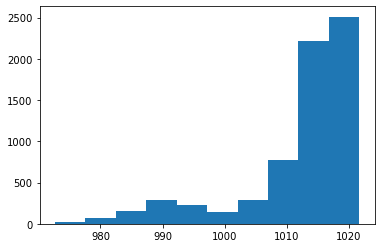

In [6]:
fig, ax = plt.subplots()
ax.hist(df_train['Valencia_pressure'])
plt.show()

In [7]:
df_train['Valencia_pressure'].mean()

1012.0514065222828

### Evaluate correlation
We evaluate the correlation of the data set.

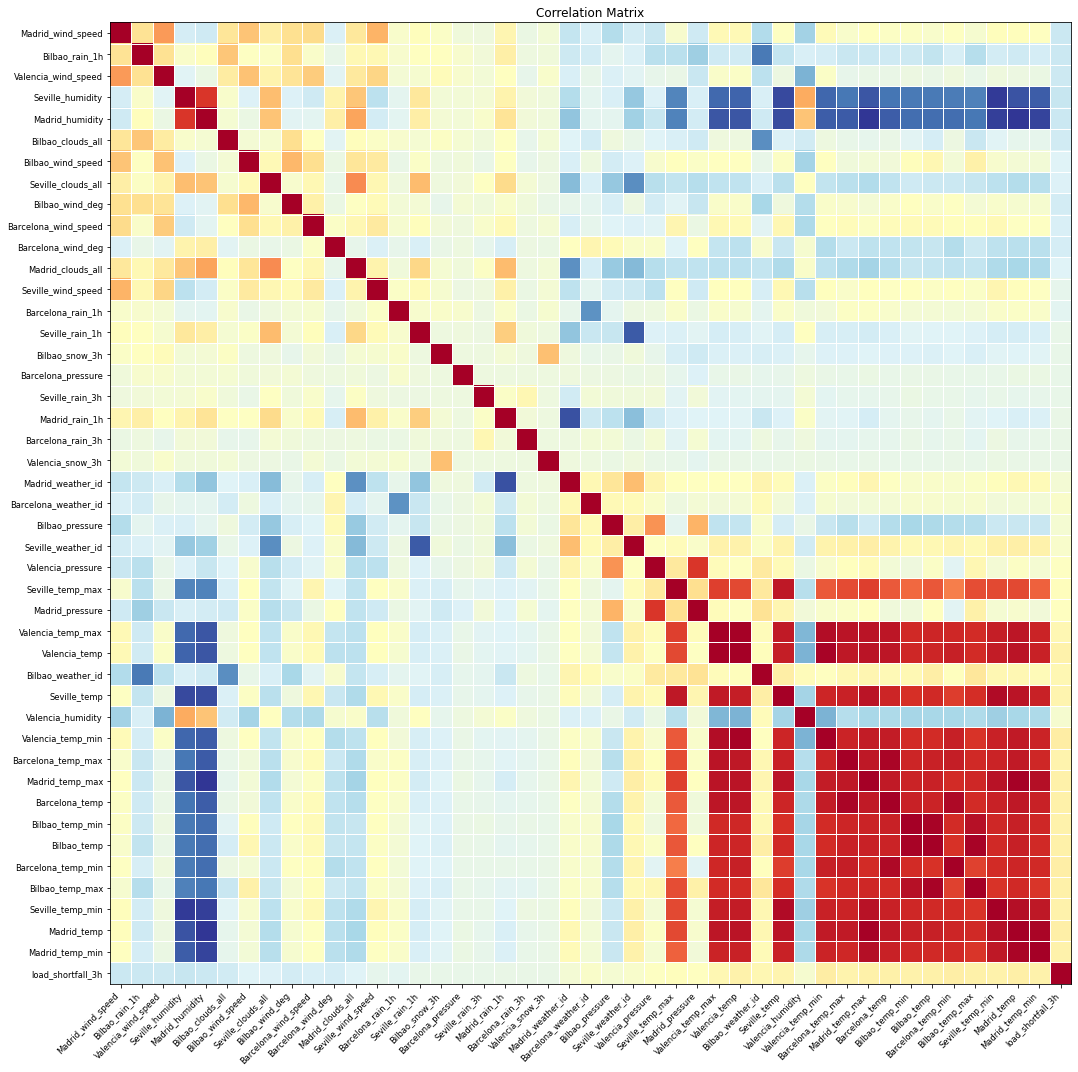

In [8]:
# evaluate correlation
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

From the above diagram, it can be seen that the temprature readings seeriously correlated and a strong decision should be taken in droping some of these columns before building our model.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Remove missing values/ features

The proportion of null values in the Valencia_pressure column is around 23% of the total row count, for now, we may consider replacing these missing values with the average value for the entire colunm. The link below is a guide.
<a href='https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/'>How to handle missing values</a>

*We write a function that replaces the missing values for a colunm in a dataframe with its mean value*

In [9]:
#function replacee_null_with_mean replace the null values in a dataframe column with its mean value    

def replace_null_with_mean(df, col):
    df_cols = df.columns
    if col not in df_cols:
        raise ValueError
        
    new_df = df.copy()
    mean_val = new_df[col].mean()
    
    def mean_value(val):
        if np.isnan(val) :
            return mean_val
        return val

    
    new_df[col] = new_df[col].apply(mean_value)
#     new_df[col].replace(np.NaN, mean_val)
    
    return new_df
  

*Replace the null values in column Valencia_pressure with its mean value*

In [10]:
improved_df = replace_null_with_mean(df_train, "Valencia_pressure")

#### Change of variable name 
Going forward, we shall be working with the variable name 
#####  *improved_df* 
as the variable that contains the training data set.

In [11]:
# look at data statistics
improved_df['Valencia_pressure'].isna().sum()

0

### Create new features

#### Conducted some domain research 

From the result of the little domain research conducted, it can be infered that the columns which ends with 
#### *'clouds_all', 'weather_id', 'temp','temp_min'*
might not be necessarily be useful for the purpose of this operation, hence all columns associated with these values can be droped.

In [12]:
# function drop_columns accepts a dataframe, a turple of columns that should be droped, and returns a new dataframe
def drop_columns(df, cols):
    col_name = [col for col in df if col.endswith(cols)]
    accepted_col_name = [col for col in df if col not in col_name]
    df_modified = df[accepted_col_name]
    
    return df_modified

### The operation below marks the difference between this work and any other work

In [13]:
# Remove columns that will generally not affect the response from domain research of renewable energy 
cols_not_needed = ('clouds_all', 'weather_id', 'temp_max','temp_min')
improved_df = drop_columns(improved_df, cols_not_needed)
improved_df.shape

(8763, 31)

In [14]:
# look at data statistics
improved_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Bilbao_wind_deg       8763 non-null   float64
 9   Barcelona_wind_speed  8763 non-null   float64
 10  Barcelona_wind_deg    8763 non-null   float64
 11  Seville_wind_speed    8763 non-null   float64
 12  Barcelona_rain_1h     8763 non-null   float64
 13  Seville_pressure      8763 non-null   object 
 14  Seville_rain_1h       8763 non-null   float64
 15  Bilbao_snow_3h       

#### Analysis for the result above
From the result seen above, the columns size reduced to 31, and it can be seen that we have a time column, which is not necessarily in its right data type(object), and will need to be improved upon.
Also, column *Seville_pressure* and *Valencia_winf_deg* are not numeric values, and this will largely affect the accuracy of our model if left in this present form.


In [15]:
# convert time col to pandas datetime type
def conver_time(df, col):
    return pd.to_datetime(df['time'])
improved_df['time'] = conver_time(improved_df, 'time')
improved_df['time'].dtype

dtype('<M8[ns]')

To improve on Seville_pressure and Valencia_wind_deg, we need to deploy the concept of dummy variables

In [16]:
improved_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_temp,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,...,1035.000000,1002.666667,971.333333,269.888000,274.254667,75.666667,281.013000,269.338615,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,...,1035.666667,1004.333333,972.666667,271.728333,274.945000,71.000000,280.561667,270.376000,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,...,1036.000000,1005.333333,974.000000,278.008667,278.792000,65.666667,281.583667,275.027229,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,...,1036.000000,1009.000000,994.666667,284.899552,285.394000,54.000000,283.434104,281.135063,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,...,1035.333333,1012.051407,1035.333333,283.015115,285.513719,58.333333,284.213167,282.252063,280.678437,6620.666667


#### Review the correlation of the improved data set

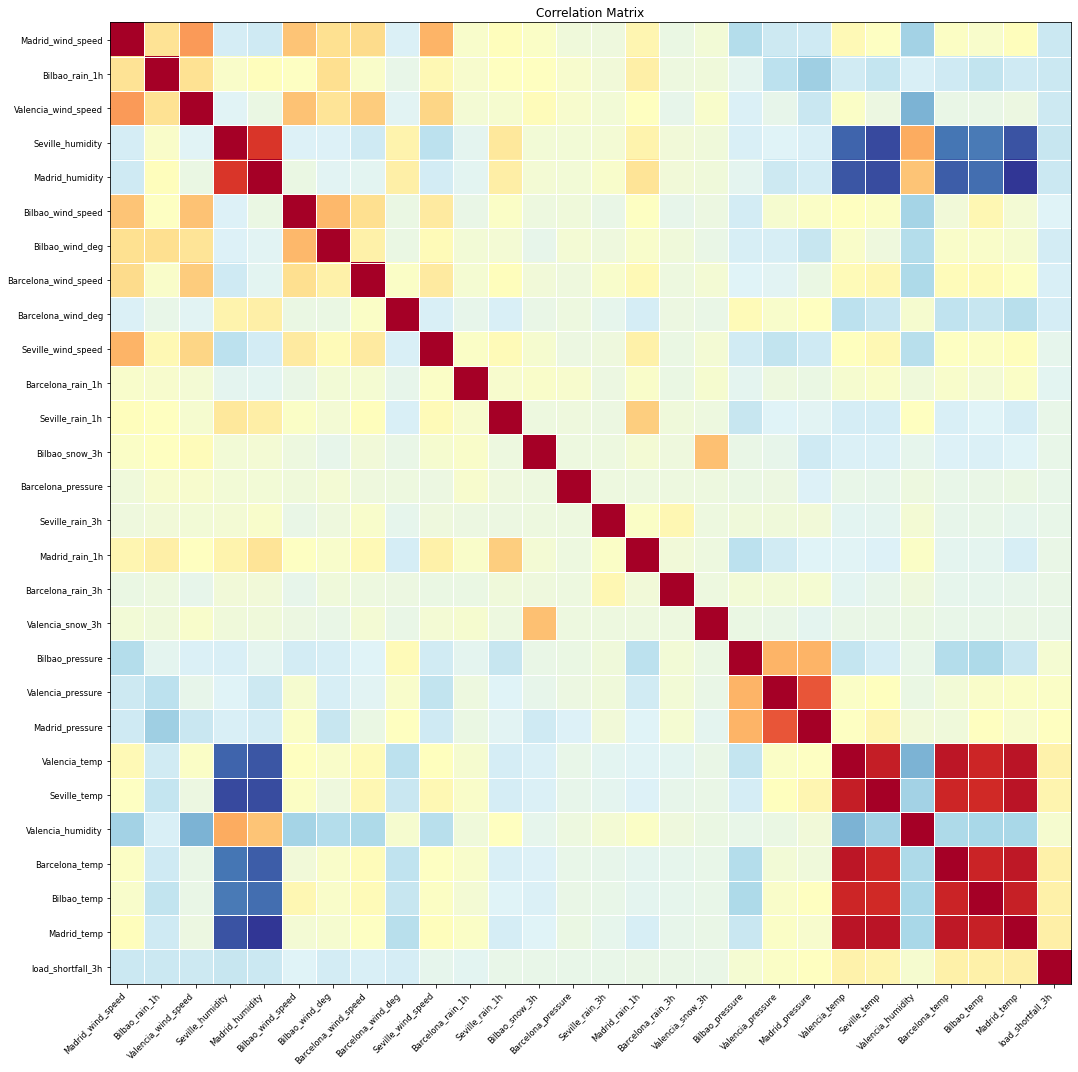

In [17]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df.corr(), xnames = improved_df.corr().columns, ax = ax);

From the above it can be seen that alot of features are still strongly correlated. We shall bear this features in mind, while we proceed to engineer *'Valencia_wind_deg','Seville_pressure'* features, because their current data type(object) will have some great negative impact on our model

In [18]:
# Converts columns with object type to numeric data type, and drops the first column
def object_converter(df):
    new_df = df.copy()
    cols = df.columns
    object_type = [col for col in cols if df[col].dtype == 'O']
    new_df = pd.get_dummies(df, columns= object_type,drop_first=True)
    return new_df

In [19]:
improved_df = object_converter(improved_df)
improved_df_2 = improved_df.copy() # Create a copy of the dataset, to enable modeling with two different dataset
improved_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_wind_speed           8763 non-null   float64       
 7   Bilbao_wind_deg             8763 non-null   float64       
 8   Barcelona_wind_speed        8763 non-null   float64       
 9   Barcelona_wind_deg          8763 non-null   float64       
 10  Seville_wind_speed          8763 non-null   float64       
 11  Barcelona_rain_1h           8763 non-null   float64     

In [20]:
improved_df_2.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,...,0,0,1,0,0,0,0,0,0,0


In [21]:
#Split datetime columns to year, month, week, day and hour columns

def split_datetime_col(df, col):  
    new_df = df.copy()
    new_df['year'] = new_df[col].dt.year
    new_df['month'] = new_df[col].dt.month
    new_df['week'] = new_df[col].dt.week
    new_df['day'] = new_df[col].dt.day
    new_df['hour'] = new_df[col].dt.hour
    return new_df
improved_df_2 = split_datetime_col(improved_df_2, 'time')
improved_df_2.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,year,month,week,day,hour
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,...,0,0,0,0,0,2015,1,1,1,3
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,...,0,0,0,0,0,2015,1,1,1,6
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,...,0,0,0,0,0,2015,1,1,1,9
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,...,0,0,0,0,0,2015,1,1,1,12
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,...,0,0,0,0,0,2015,1,1,1,15


### Correlation 
We plot the correlation heat map again, to enable us properly visualize this relationship

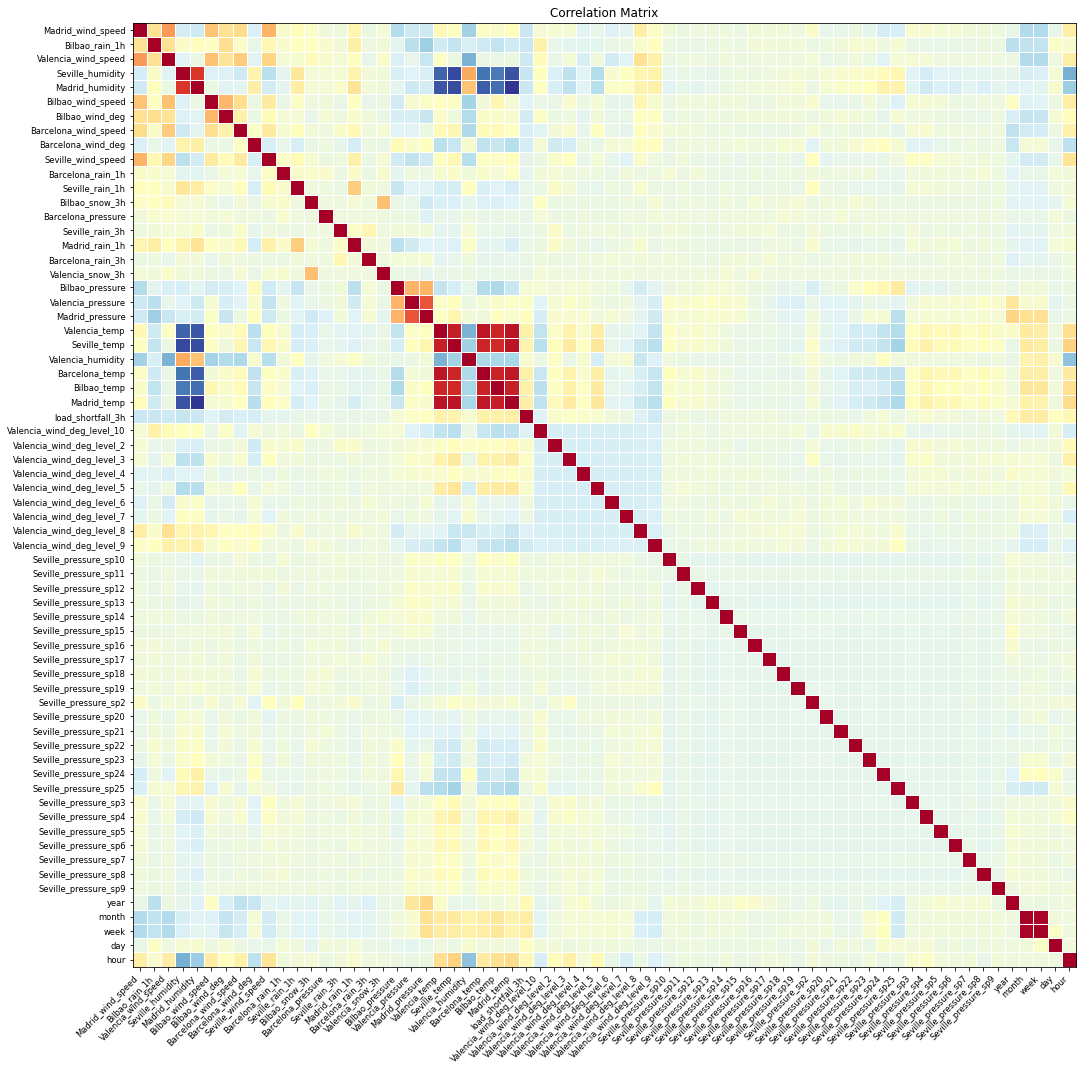

In [22]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df_2.corr(), xnames = improved_df_2.corr().columns, ax = ax);

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Fitting the model using `statsmodels.OLS`

We shall first, fit the model using statsmodels.ols, to enable us properly evaluate the appropriateness of the regression models we fit.

### Generating the regression string
We first generate a string of the form:

`y ~ X`

which is read as follows: "Regress y on X". 

#### Hence, we create targets and features dataset
To successfully achieve this, we first need to view the order of our columns, to confirm that it fits with the desired result

From the result seen above, its obvious that we have to reorder our data set.

In [23]:
column_titles = [col for col in improved_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
improved_df = improved_df.reindex(columns=column_titles)
improved_df.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity', 'Barcelona_temp',
       'Bilbao_temp', 'Madrid_temp', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_6', 'Valencia_wind_deg_level_7',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp10', 'Seville_pressure_sp11',
       'Seville_pressure_sp12', 'Seville_pressure_sp13

In [24]:
column_titles_2 = [col for col in improved_df_2.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
improved_df_2 = improved_df_2.reindex(columns=column_titles_2)
improved_df_2.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity', 'Barcelona_temp',
       'Bilbao_temp', 'Madrid_temp', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_6', 'Valencia_wind_deg_level_7',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp10', 'Seville_pressure_sp11',
       'Seville_pressure_sp12', 'Seville_pressure_sp13

In [25]:
formula_str = improved_df.columns[-1]+' ~ '+'+'.join(improved_df.columns[1:-1]); formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Bilbao_pressure+Valencia_pressure+Madrid_pressure+Valencia_temp+Seville_temp+Valencia_humidity+Barcelona_temp+Bilbao_temp+Madrid_temp+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp11+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp14+Seville_pressure_sp15+Seville_pressure_sp16+Seville_pressure_sp17+Seville_pressure_sp18+Seville_pressure_sp19+Seville_pressure_sp2+Seville_pressure_sp20+Seville_pressure_sp21+Seville_pres

In [26]:
formula_str_2 = improved_df_2.columns[-1]+' ~ '+'+'.join(improved_df_2.columns[1:-1]); formula_str_2

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Bilbao_pressure+Valencia_pressure+Madrid_pressure+Valencia_temp+Seville_temp+Valencia_humidity+Barcelona_temp+Bilbao_temp+Madrid_temp+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp11+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp14+Seville_pressure_sp15+Seville_pressure_sp16+Seville_pressure_sp17+Seville_pressure_sp18+Seville_pressure_sp19+Seville_pressure_sp2+Seville_pressure_sp20+Seville_pressure_sp21+Seville_pres

### Construct and fit the model
​
We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [27]:
import statsmodels.formula.api as sm
model=sm.ols(formula=formula_str, data=improved_df)

In [28]:
# fit and print the model
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     22.01
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          1.26e-218
Time:                        02:00:31   Log-Likelihood:                -86825.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8702   BIC:                         1.742e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the result above

#### `R-squared : 0.126:`
The R-squared value is very far from 1, which is a signed to show that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, it can also be inferred that some featore are not rlevent to the model, and needs to be droped,there is also a warning about strong multicollinearity, which also resonates the result of the poor result we got above.

We proceed by droping features using the correlation heat map and the summary table above as a guide.


In [29]:
model_2=sm.ols(formula=formula_str_2, data=improved_df_2)
fitted_2 = model_2.fit()
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     26.02
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          4.18e-281
Time:                        02:00:32   Log-Likelihood:                -86665.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8697   BIC:                         1.739e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the result above

#### `R-squared : 0.158:`
The R-squared value is very far from 1, which is a signed to show that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, it can also be inferred that some featore are not rlevent to the model, and needs to be droped,there is also a warning about strong multicollinearity, which also resonates the result of the poor result we got above.

We proceed by droping features using the correlation heat map and the summary table above as a guide.

In [30]:
# Calculate correlations between predictor variables and the response variable for improved_df without time
improved_df_corrs = improved_df.corr()['load_shortfall_3h'].sort_values(ascending=False)
improved_df_corrs

load_shortfall_3h      1.000000
Madrid_temp            0.186036
Barcelona_temp         0.182673
Bilbao_temp            0.176411
Valencia_temp          0.173225
                         ...   
Valencia_wind_speed   -0.142791
Madrid_humidity       -0.150536
Madrid_wind_speed     -0.150981
Bilbao_rain_1h        -0.152510
Seville_humidity      -0.167290
Name: load_shortfall_3h, Length: 61, dtype: float64

In [31]:
# Calculate correlations between predictor variables and the response variable for improved_df with time
improved_df_corrs_2 = improved_df_2.corr()['load_shortfall_3h'].sort_values(ascending=False)
improved_df_corrs_2

load_shortfall_3h      1.000000
week                   0.201080
month                  0.199048
Madrid_temp            0.186036
Barcelona_temp         0.182673
                         ...   
Valencia_wind_speed   -0.142791
Madrid_humidity       -0.150536
Madrid_wind_speed     -0.150981
Bilbao_rain_1h        -0.152510
Seville_humidity      -0.167290
Name: load_shortfall_3h, Length: 66, dtype: float64

### Feature Selection
As seen from above the features for improved_df are less correlated to the dependant variable, we proceed to only select features with pearson value less than 0.05

In [32]:
# Select only colunms with p_value < 0.05 which we call reduced_improved_df

def person_filter(df, dependant , p_value = 0.05):
    cols = df.columns
    passed_col = []
    for col in cols:
        if col not in [dependant, 'time']:
            p_val = round(pearsonr(df[col], df[dependant])[1],6)
            if p_val < p_value:
                passed_col.append(col)
    new_df = df[passed_col]         
    return new_df

reduced_improved_df = person_filter(improved_df, 'load_shortfall_3h', 0.01)
reduced_improved_df_2 = person_filter(improved_df_2, 'load_shortfall_3h', 0.01)
reduced_improved_df_2.head()


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,year,month,week,day,hour
0,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,3.333333,...,0,0,0,0,0,2015,1,1,1,3
1,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,3.333333,...,0,0,0,0,0,2015,1,1,1,6
2,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,2.666667,...,0,1,0,0,0,2015,1,1,1,9
3,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,4.000000,...,1,0,0,0,0,2015,1,1,1,12
4,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,3.000000,...,0,0,0,0,0,2015,1,1,1,15


In [33]:
reduced_improved_df_2.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,year,month,week,day,hour
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.377854,0.270950,0.294640,-0.095380,0.434104,...,0.191565,0.077413,-0.010906,-0.113807,0.050881,-0.031553,-0.237445,-0.236441,-0.029954,0.186228
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.085398,0.279350,0.069997,-0.030723,0.140101,...,0.057474,0.094940,0.048573,-0.001711,-0.032579,-0.200747,-0.188274,-0.179233,0.072752,0.054527
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.386478,0.248643,0.347966,-0.066071,0.316035,...,0.269278,0.169264,0.013398,-0.064648,0.028170,-0.012650,-0.237156,-0.232338,-0.000340,0.204103
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,-0.088180,-0.087246,-0.138625,0.164064,-0.202449,...,0.151993,0.166851,0.069857,0.113068,-0.117402,-0.045730,-0.111622,-0.094444,0.032979,-0.424982
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,-0.016808,-0.069570,-0.058518,0.183725,-0.125680,...,0.168297,0.174269,0.071213,0.174900,-0.134485,-0.084456,-0.076567,-0.054840,0.047372,-0.307872
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,1.000000,0.417534,0.275317,-0.018225,0.213420,...,0.143713,0.043193,-0.032121,-0.028225,0.040686,0.082611,-0.086698,-0.076455,-0.008020,0.197848
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.417534,1.000000,0.177393,-0.015481,0.120378,...,0.095727,0.090291,0.020224,-0.042224,-0.004427,-0.104647,-0.174941,-0.168192,0.034253,0.110457
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.275317,0.177393,1.000000,0.076376,0.212193,...,0.096282,0.053871,-0.021430,-0.017354,0.054248,-0.188756,-0.122221,-0.115935,-0.009699,0.182538
Barcelona_wind_deg,-0.095380,-0.030723,-0.066071,0.164064,0.183725,-0.018225,-0.015481,0.076376,1.000000,-0.098837,...,0.105888,0.095747,0.047177,0.101460,-0.063873,-0.155275,0.021463,0.028349,-0.039703,-0.192949
Seville_wind_speed,0.434104,0.140101,0.316035,-0.202449,-0.125680,0.213420,0.120378,0.212193,-0.098837,1.000000,...,0.054809,-0.001683,-0.037165,-0.033405,0.078056,-0.055772,-0.122624,-0.124176,-0.030206,0.251261


In [34]:
# Returns columns with specidied correlation value
def get_high_cor_feat(df, corr_val):
    corr_df = df.corr()
    cols = df.columns
    col_arr = []
    
    def eval_corr(label, data):
        pass_col = [col for col in cols if ((abs(data[col]) > corr_val) & (col != label ) )]
        return pass_col

    for label, data in corr_df.iterrows():
        arr = eval_corr(label, data)
        col_arr = col_arr + arr
    
    return list(set(col_arr))

In [35]:
get_high_cor_feat(reduced_improved_df, 0.5)

['Bilbao_temp',
 'Madrid_humidity',
 'Valencia_wind_speed',
 'Barcelona_temp',
 'Madrid_pressure',
 'Valencia_pressure',
 'Madrid_temp',
 'Valencia_temp',
 'Seville_humidity',
 'Seville_temp',
 'Madrid_wind_speed']

In [36]:
#Drops fetures with high correlation value
cols = get_high_cor_feat(reduced_improved_df, 0.9)
corr_filt_df = reduced_improved_df.drop(columns = cols, axis = 1)
corr_filt_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4
0,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,3.333333,...,0,0,0,0,1,0,0,0,0,0
1,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,3.333333,...,1,0,0,0,0,0,0,0,0,0
2,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,2.666667,...,0,0,0,0,0,0,1,0,0,0
3,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,4.000000,...,0,0,0,0,0,1,0,0,0,0
4,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cols_2 = get_high_cor_feat(reduced_improved_df_2, 0.9)
corr_filt_df_2 = reduced_improved_df_2.drop(columns = cols, axis = 1)
corr_filt_df_2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,year,month,week,day,hour
0,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,3.333333,...,0,0,0,0,0,2015,1,1,1,3
1,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,3.333333,...,0,0,0,0,0,2015,1,1,1,6
2,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,2.666667,...,0,1,0,0,0,2015,1,1,1,9
3,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,4.000000,...,1,0,0,0,0,2015,1,1,1,12
4,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,3.000000,...,0,0,0,0,0,2015,1,1,1,15


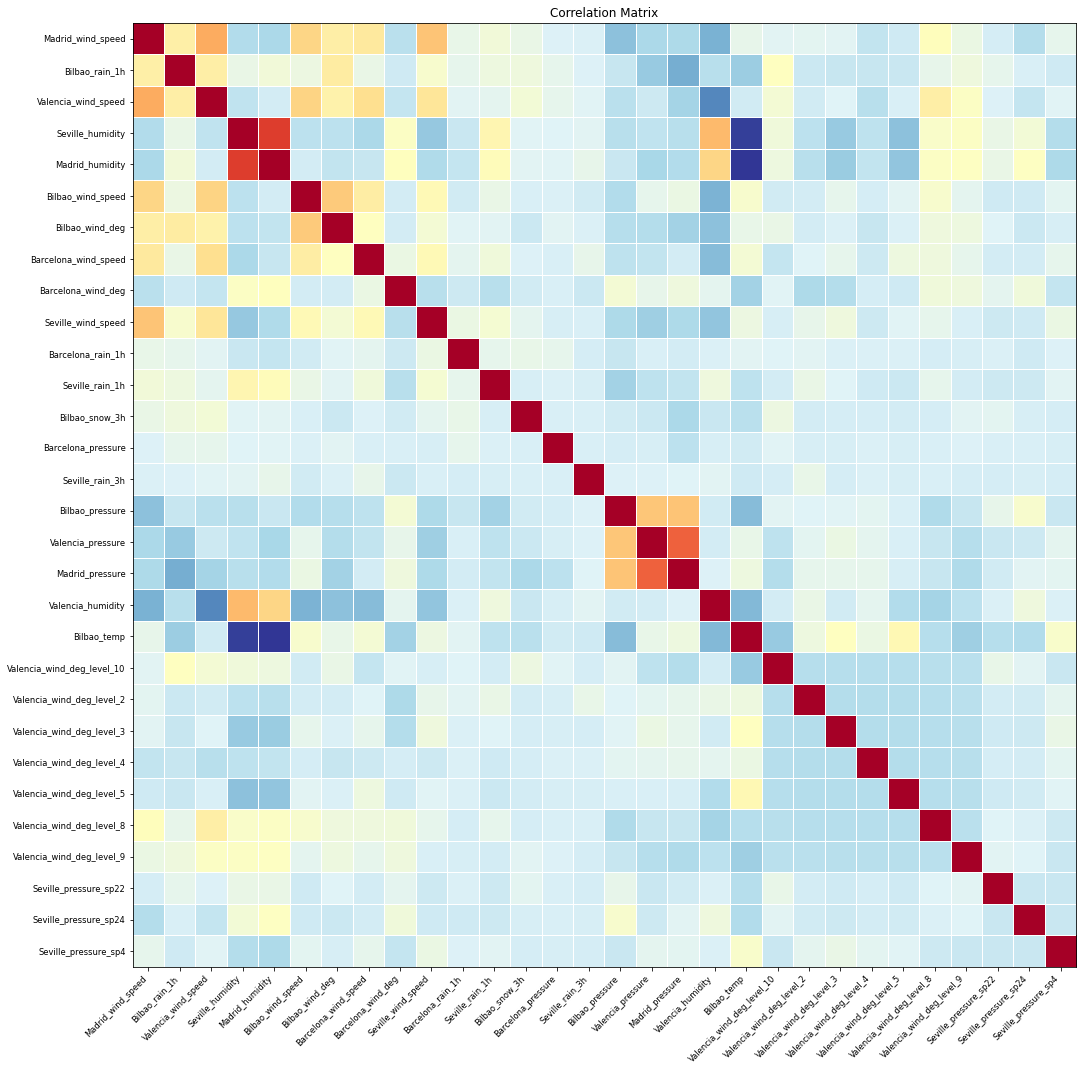

In [38]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(corr_filt_df.corr(), xnames = corr_filt_df.corr().columns, ax = ax);

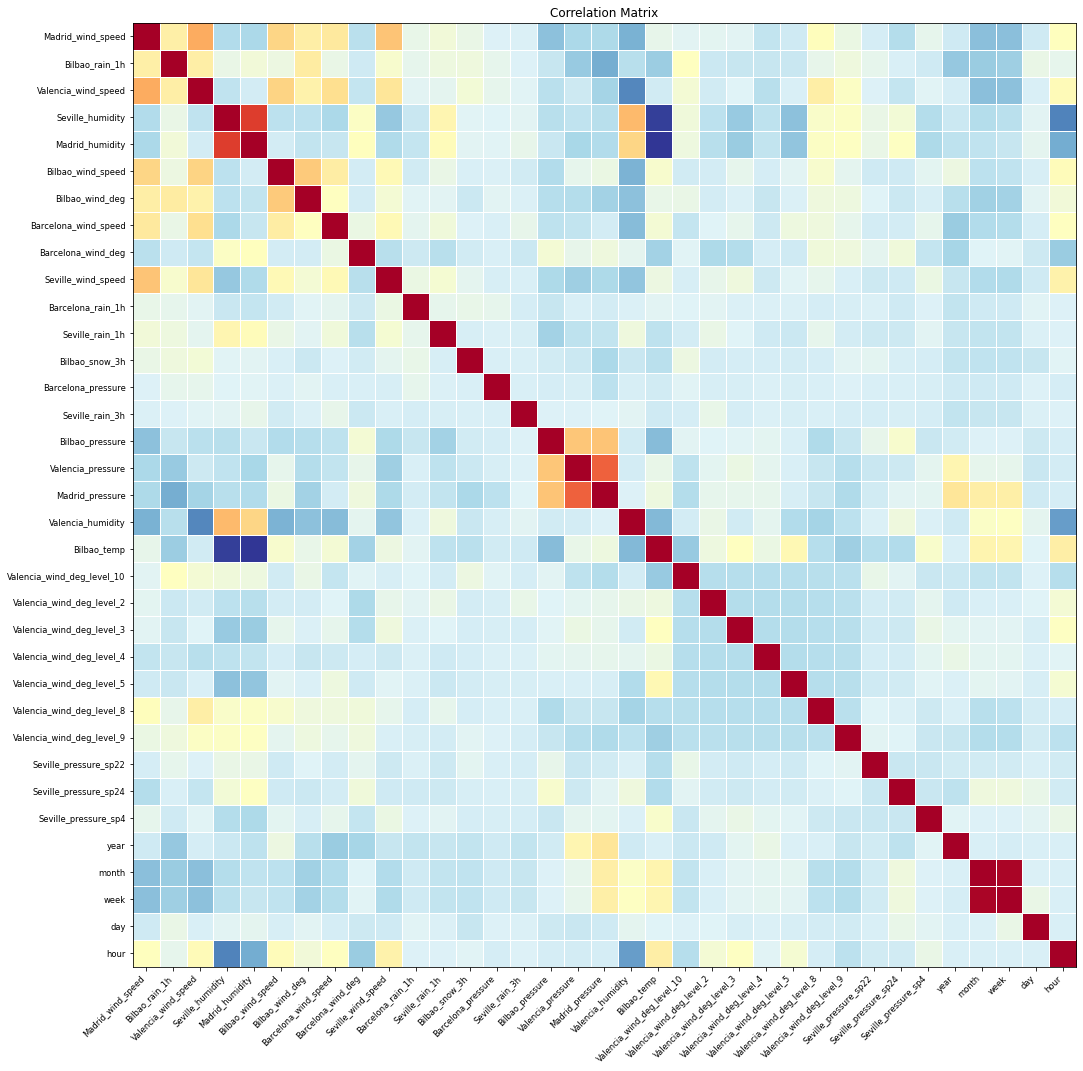

In [39]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(corr_filt_df_2.corr(), xnames = corr_filt_df_2.corr().columns, ax = ax);

In [40]:
corr_filt_df_cols = corr_filt_df.columns
corr_filt_df_cols

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_humidity', 'Bilbao_temp', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp22', 'Seville_pressure_sp24',
       'Seville_pressure_sp4'],
      dtype='object')

In [41]:
corr_filt_df_cols_2 = corr_filt_df_2.columns
corr_filt_df_cols_2

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_humidity', 'Bilbao_temp', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp22', 'Seville_pressure_sp24',
       'Seville_pressure_sp4', 'year', 'month', 'week', 'day', 'hour'],
      dtype='object')

In [42]:
corr_filt_df['load_shortfall_3h'] = improved_df['load_shortfall_3h']
corr_filt_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,load_shortfall_3h
0,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,3.333333,...,0,0,0,1,0,0,0,0,0,6715.666667
1,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,3.333333,...,0,0,0,0,0,0,0,0,0,4171.666667
2,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,2.666667,...,0,0,0,0,0,1,0,0,0,4274.666667
3,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,4.000000,...,0,0,0,0,1,0,0,0,0,5075.666667
4,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,3.000000,...,0,0,0,0,0,0,0,0,0,6620.666667


In [43]:
corr_filt_df_2['load_shortfall_3h'] = improved_df_2['load_shortfall_3h']
corr_filt_df_2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,year,month,week,day,hour,load_shortfall_3h
0,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,3.333333,...,0,0,0,0,2015,1,1,1,3,6715.666667
1,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,3.333333,...,0,0,0,0,2015,1,1,1,6,4171.666667
2,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,2.666667,...,1,0,0,0,2015,1,1,1,9,4274.666667
3,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,4.000000,...,0,0,0,0,2015,1,1,1,12,5075.666667
4,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,3.000000,...,0,0,0,0,2015,1,1,1,15,6620.666667


From the above, we can still drop more features, infact we can drop all values that ends with humidity, as they are strongly negatively correlated to temperature values.


In [44]:
formula_str = corr_filt_df.columns[-1]+' ~ '+'+'.join(corr_filt_df.columns[1:-1]); formula_str

'load_shortfall_3h ~ Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Bilbao_pressure+Valencia_pressure+Madrid_pressure+Valencia_humidity+Bilbao_temp+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp22+Seville_pressure_sp24+Seville_pressure_sp4'

In [45]:
formula_str_2 = corr_filt_df_2.columns[-1]+' ~ '+'+'.join(corr_filt_df_2.columns[1:-1]); formula_str_2

'load_shortfall_3h ~ Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Bilbao_pressure+Valencia_pressure+Madrid_pressure+Valencia_humidity+Bilbao_temp+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp22+Seville_pressure_sp24+Seville_pressure_sp4+year+month+week+day+hour'

In [46]:
model=sm.ols(formula=formula_str, data=corr_filt_df)
# fit and print the model
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     36.37
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          3.12e-191
Time:                        02:00:34   Log-Likelihood:                -86944.
No. Observations:                8763   AIC:                         1.739e+05
Df Residuals:                    8733   BIC:                         1.742e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [47]:
model_2=sm.ols(formula=formula_str_2, data=corr_filt_df_2)
# fit and print the model
fitted_2 = model_2.fit()
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     44.02
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          4.12e-269
Time:                        02:00:34   Log-Likelihood:                -86750.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8728   BIC:                         1.738e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the two results above

#### `R-squared best value : 0.126(without time) & 0.158 (with time) for the best p-test threshold, 0.119(without time) & 0.156 (with time) `
The R-squared value is very far from 1, which further confirms that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, which are all below 0.05 threshold, it further resonate that this model is not a good model for the data set.


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [48]:
#Load train data
df_test = pd.read_csv("df_test.csv", index_col=0)

In [49]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [50]:
# look at data statistics
df_test['Valencia_pressure'].isna().sum()

454

In [51]:
clean_test_df = replace_null_with_mean(df_test, "Valencia_pressure")
clean_test_df['Valencia_pressure'].isna().sum()

0

In [52]:
# Remove columns that will generally not affect the response from domain research of renewable energy 
cols_not_needed = ('clouds_all', 'weather_id', 'temp_max','temp_min')
clean_test_df = drop_columns(clean_test_df, cols_not_needed)
clean_test_df.shape

(2920, 30)

In [53]:
clean_test_df['time'] = conver_time(clean_test_df, 'time')
clean_test_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,...,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_temp,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,3.000000,193.333333,4.000000,...,0,1025.666667,1013.148351,1030.000000,287.483333,283.673333,46.333333,287.356667,280.380000,279.866667
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,3.666667,143.333333,4.666667,...,0,1026.666667,1013.148351,1030.333333,284.150000,281.673333,53.666667,284.190000,281.010000,279.193333
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,2.333333,130.000000,4.000000,...,0,1025.333333,1013.148351,1030.666667,282.816667,280.613333,42.000000,283.150000,279.196667,276.340000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,5.666667,196.666667,2.333333,...,0,1025.000000,1013.148351,1032.333333,283.483333,279.936667,45.000000,283.190000,281.740000,275.953333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,10.666667,233.333333,4.666667,...,0,1022.333333,1013.148351,1032.333333,287.150000,285.570000,41.000000,286.816667,284.116667,280.686667


In [54]:
clean_test_df_copy = object_converter(clean_test_df)
clean_test_df_copy_2 = clean_test_df_copy.copy() # Create a copy of the dataset, to enable modeling with two different dataset
clean_test_df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        2920 non-null   datetime64[ns]
 1   Madrid_wind_speed           2920 non-null   float64       
 2   Bilbao_rain_1h              2920 non-null   float64       
 3   Valencia_wind_speed         2920 non-null   float64       
 4   Seville_humidity            2920 non-null   float64       
 5   Madrid_humidity             2920 non-null   float64       
 6   Bilbao_wind_speed           2920 non-null   float64       
 7   Bilbao_wind_deg             2920 non-null   float64       
 8   Barcelona_wind_speed        2920 non-null   float64       
 9   Barcelona_wind_deg          2920 non-null   float64       
 10  Seville_wind_speed          2920 non-null   float64       
 11  Barcelona_rain_1h           2920 non-null   float64 

In [55]:
clean_test_df_copy_2_time = split_datetime_col(clean_test_df_copy_2, 'time')
clean_test_df_copy_2_time.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,year,month,week,day,hour
8763,2018-01-01 00:00:00,5.000000,0.0,5.000000,87.000000,71.333333,3.000000,193.333333,4.000000,176.666667,...,0,0,0,0,0,2018,1,1,1,0
8764,2018-01-01 03:00:00,4.666667,0.0,5.333333,89.000000,78.000000,3.666667,143.333333,4.666667,266.666667,...,0,0,0,0,0,2018,1,1,1,3
8765,2018-01-01 06:00:00,2.333333,0.0,5.000000,89.000000,89.666667,2.333333,130.000000,4.000000,263.333333,...,0,0,0,0,0,2018,1,1,1,6
8766,2018-01-01 09:00:00,2.666667,0.0,5.333333,93.333333,82.666667,5.666667,196.666667,2.333333,86.666667,...,0,0,0,0,0,2018,1,1,1,9
8767,2018-01-01 12:00:00,4.000000,0.0,8.666667,65.333333,64.000000,10.666667,233.333333,4.666667,283.333333,...,0,0,0,0,0,2018,1,1,1,12


In [56]:
predict_test_data_time = clean_test_df['time']
predict_test_data_time

8763    2018-01-01 00:00:00
8764    2018-01-01 03:00:00
8765    2018-01-01 06:00:00
8766    2018-01-01 09:00:00
8767    2018-01-01 12:00:00
                ...        
11678   2018-12-31 09:00:00
11679   2018-12-31 12:00:00
11680   2018-12-31 15:00:00
11681   2018-12-31 18:00:00
11682   2018-12-31 21:00:00
Name: time, Length: 2920, dtype: datetime64[ns]

In [57]:

needed_col = corr_filt_df.columns
test_col = clean_test_df_copy.columns
cols_not_needed = [col for col in test_col if col not in needed_col ]
clean_test_df_copy = clean_test_df_copy.drop(columns = cols_not_needed, axis = 1 )
clean_test_df_copy.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4
8763,5.000000,0.0,5.000000,87.000000,71.333333,3.000000,193.333333,4.000000,176.666667,1.000000,...,0,0,0,0,0,1,0,0,0,0
8764,4.666667,0.0,5.333333,89.000000,78.000000,3.666667,143.333333,4.666667,266.666667,0.666667,...,0,0,0,0,0,1,0,0,0,0
8765,2.333333,0.0,5.000000,89.000000,89.666667,2.333333,130.000000,4.000000,263.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0
8766,2.666667,0.0,5.333333,93.333333,82.666667,5.666667,196.666667,2.333333,86.666667,1.333333,...,0,0,0,0,0,0,0,0,0,0
8767,4.000000,0.0,8.666667,65.333333,64.000000,10.666667,233.333333,4.666667,283.333333,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [58]:
needed_col_2 = corr_filt_df_2.columns

test_col_2 = clean_test_df_copy_2_time.columns
cols_not_needed_2 = [col for col in test_col_2 if col not in needed_col_2 ]
clean_test_df_copy_2 = clean_test_df_copy_2_time.drop(columns = cols_not_needed_2, axis = 1 )
clean_test_df_copy_2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,...,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp22,Seville_pressure_sp24,Seville_pressure_sp4,year,month,week,day,hour
8763,5.000000,0.0,5.000000,87.000000,71.333333,3.000000,193.333333,4.000000,176.666667,1.000000,...,1,0,0,0,0,2018,1,1,1,0
8764,4.666667,0.0,5.333333,89.000000,78.000000,3.666667,143.333333,4.666667,266.666667,0.666667,...,1,0,0,0,0,2018,1,1,1,3
8765,2.333333,0.0,5.000000,89.000000,89.666667,2.333333,130.000000,4.000000,263.333333,0.666667,...,0,0,0,0,0,2018,1,1,1,6
8766,2.666667,0.0,5.333333,93.333333,82.666667,5.666667,196.666667,2.333333,86.666667,1.333333,...,0,0,0,0,0,2018,1,1,1,9
8767,4.000000,0.0,8.666667,65.333333,64.000000,10.666667,233.333333,4.666667,283.333333,1.000000,...,0,0,0,0,0,2018,1,1,1,12


In [59]:
predict_result = fitted.predict(clean_test_df_copy)

In [60]:
predict_result_2 = fitted_2.predict(clean_test_df_copy_2)

In [61]:
print(predict_result)

8763      8772.619917
8764      8409.960999
8765      8882.003843
8766      9504.525832
8767      8227.013129
             ...     
11678     8480.126086
11679    10728.683667
11680    10684.156361
11681    11102.080301
11682     8933.424789
Length: 2920, dtype: float64


In [62]:
print(predict_result_2)

8763      7494.257015
8764      7539.553051
8765      8073.491793
8766      8452.188353
8767      7326.349335
             ...     
11678    10736.603238
11679    12503.470601
11680    12598.588808
11681    13273.877074
11682    11996.000825
Length: 2920, dtype: float64


In [63]:
my_dict = {
    'time': predict_test_data_time,
    'load_shortfall_3h':predict_result
}

In [64]:
my_dict_2 = {
    'time': predict_test_data_time,
    'load_shortfall_3h':predict_result_2
}

In [65]:
new_pandas = pd.DataFrame(my_dict)

In [66]:
new_pandas_2 = pd.DataFrame(my_dict_2)
new_pandas_2.shape

(2920, 2)

In [67]:
new_pandas.shape


(2920, 2)

In [68]:
new_pandas.to_csv('file_2.csv',index=False)

In [69]:
new_pandas_2.to_csv('file_3.csv',index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [70]:
# Compare model performance

In [71]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [72]:
# discuss chosen methods logic